In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
f = open("output.csv")
print f.readline()
d = np.loadtxt(f, delimiter=",", usecols = (0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18))

Index,Rank,Song,Artist,Year,Lyrics,ids,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence



**The columns in d correspond to the following vals:**
* col 0 = index
* col 1 = rank in year
* col 2 = year
* col 3 = energy
* col 4 = liveness
* col 5 = tempo
* col 6 = speechiness 
* col 7 = acousticness
* col 8 = instrumentalness
* col 9 = time sig
* col 10 = danceability
* col 11 = key
* col 12 = duration
* col 13 = loudness
* col 14 = valence

In [12]:
d1 = pd.DataFrame(data=d)
print d1.describe()

                0            1            2            3            4   \
count  1594.000000  1594.000000  1594.000000  1594.000000  1594.000000   
mean    800.833752    50.453576  2007.513802     0.686577     0.174070   
std     462.225967    28.878526     4.612968     0.165548     0.131940   
min       0.000000     1.000000  2000.000000     0.016400     0.021000   
25%     401.250000    25.250000  2004.000000     0.583000     0.091325   
50%     802.500000    50.000000  2008.000000     0.708000     0.121000   
75%    1200.750000    75.000000  2012.000000     0.810750     0.217000   
max    1599.000000   100.000000  2015.000000     0.989000     0.854000   

                5            6            7            8            9   \
count  1594.000000  1594.000000  1594.000000  1594.000000  1594.000000   
mean    120.962718     0.098523     0.164470     0.009851     3.981807   
std      28.969335     0.094483     0.206832     0.071802     0.240934   
min      57.107000     0.023600     0

** THE FOLLOWING CODE USES A TRAIN-TEST SPLIT TO ACCOUNT FOR POSSIBLE OVERFITTING OF THE MODEL. THE CODE REPRESENTS MULTI-FEATURE LEAST SQUARES REGRESSION USING A TRAIN-TEST SPLIT OF 0.8/0.2 **

** Backward elimination will be used to arrive at a least-squares multilinear regression model on a train-test split of 0.8/0.2 **

** We start with the full model (i.e. with all audio features) ** 

In [37]:
allX = pd.DataFrame(data=d1, columns=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) 
y = pd.DataFrame(data=d1, columns=[1]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     328.9
Date:                Sat, 14 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:40:53   Log-Likelihood:                -6091.0
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1263   BIC:                         1.227e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             23.2785      7.475      3.114      0.002       8.614      37.943
4             -3.1370      6.394     -0.491      0.624     -15.681       9.407
5              0.0269      0.028      0.957      0.339      -0.028       0.082
6            -15.3593      8.833     -1.739      0.082     -32.688       1.969
7              4.3124      4.558      0.946      0.344      -4.629      13.254
8            -12.5569     12.624     -0.995      0.320     -37.324      12.210
9              6.8502      2.205      3.107      0.002       2.525      11.175
10            -5.3089      6.546     -0.811      0.418     -18.151       7.534
11             0.2638      0.223      1.183      0.237      -0.174       0.701
12          1.444e-05   1.87e-05      0.774      0.439   -2.22e-05     5.1e-05
13            -1.6153      0.491     -3.292      0.001      -2.578      -0.653
14            -9.5177      4.376     -2.175      0.030     -18.104      -0.932
==============================================================================
Omnibus:                      594.196   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.218
Skew:                           0.019   Prob(JB):                     1.54e-15
Kurtosis:                       1.867   Cond. No.                     3.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** In ~10 runs of the above train-test split, feature 4 (liveness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model. **

In [40]:
allX = pd.DataFrame(data=d1, columns=[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     350.2
Date:                Sat, 14 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:41:18   Log-Likelihood:                -6091.8
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1264   BIC:                         1.226e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             15.9329      7.544      2.112      0.035       1.133      30.733
5              0.0260      0.028      0.930      0.353      -0.029       0.081
6             -8.8815      8.848     -1.004      0.316     -26.241       8.478
7              1.9558      4.627      0.423      0.673      -7.121      11.033
8             -9.4713     11.301     -0.838      0.402     -31.641      12.699
9              7.5504      2.191      3.446      0.001       3.252      11.849
10            -7.3437      6.419     -1.144      0.253     -19.937       5.250
11            -0.0521      0.225     -0.231      0.817      -0.494       0.390
12          2.783e-05   1.93e-05      1.440      0.150   -1.01e-05    6.57e-05
13            -1.4250      0.474     -3.003      0.003      -2.356      -0.494
14            -6.0806      4.509     -1.349      0.178     -14.926       2.765
==============================================================================
Omnibus:                      676.912   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.751
Skew:                           0.036   Prob(JB):                     4.33e-16
Kurtosis:                       1.848   Cond. No.                     3.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** In ~20 runs of the above train-test split, feature 11 (key) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model. **

In [104]:
allX = pd.DataFrame(data=d1, columns=[3, 5, 6, 7, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     387.2
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:59:53   Log-Likelihood:                -6083.2
No. Observations:                1275   AIC:                         1.219e+04
Df Residuals:                    1265   BIC:                         1.224e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             17.3388      7.450      2.327      0.020       2.724      31.954
5              0.0224      0.028      0.800      0.424      -0.032       0.077
6            -15.1916      8.772     -1.732      0.084     -32.401       2.017
7              4.6800      4.478      1.045      0.296      -4.105      13.465
8            -11.6342     11.299     -1.030      0.303     -33.802      10.534
9              8.1874      2.276      3.597      0.000       3.721      12.653
10           -10.3950      6.395     -1.626      0.104     -22.940       2.150
12          2.303e-05   1.94e-05      1.190      0.234   -1.49e-05     6.1e-05
13            -1.2463      0.467     -2.667      0.008      -2.163      -0.329
14            -4.8495      4.343     -1.117      0.264     -13.370       3.671
==============================================================================
Omnibus:                      583.630   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.818
Skew:                           0.004   Prob(JB):                     1.88e-15
Kurtosis:                       1.870   Cond. No.                     3.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~20 runs of the above train-test split, feature 5 (tempo) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [68]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 7, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     428.3
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:52:53   Log-Likelihood:                -6091.3
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1266   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             18.4663      7.412      2.491      0.013       3.925      33.008
6            -17.5651      8.902     -1.973      0.049     -35.029      -0.101
7             -0.0341      4.565     -0.007      0.994      -8.990       8.922
8            -21.7219     12.349     -1.759      0.079     -45.948       2.504
9              6.8669      2.179      3.151      0.002       2.591      11.142
10            -7.6075      6.523     -1.166      0.244     -20.404       5.189
12          4.198e-05   1.93e-05      2.176      0.030    4.13e-06    7.98e-05
13            -1.6773      0.468     -3.583      0.000      -2.596      -0.759
14            -5.1736      4.439     -1.166      0.244     -13.882       3.534
==============================================================================
Omnibus:                      579.621   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.747
Skew:                           0.017   Prob(JB):                     1.95e-15
Kurtosis:                       1.871   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 7 (acousticness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [108]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 8, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     474.8
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:01:12   Log-Likelihood:                -6099.3
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1267   BIC:                         1.226e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             23.5612      7.011      3.361      0.001       9.807      37.316
6            -11.0298      8.729     -1.264      0.207     -28.155       6.095
8             -7.9816     11.362     -0.703      0.482     -30.271      14.308
9              7.6291      2.055      3.713      0.000       3.598      11.660
10            -8.8986      6.446     -1.381      0.168     -21.544       3.747
12          2.198e-05   1.93e-05      1.136      0.256    -1.6e-05    5.99e-05
13            -1.7957      0.460     -3.903      0.000      -2.698      -0.893
14            -9.7894      4.382     -2.234      0.026     -18.387      -1.192
==============================================================================
Omnibus:                      603.661   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.534
Skew:                           0.022   Prob(JB):                     1.31e-15
Kurtosis:                       1.865   Cond. No.                     3.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 8 (instrumentalness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [85]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 10, 12, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     558.5
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:56:13   Log-Likelihood:                -6092.7
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1268   BIC:                         1.224e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             20.0930      6.855      2.931      0.003       6.645      33.541
6             -9.9723      8.854     -1.126      0.260     -27.342       7.397
9              8.2547      2.016      4.096      0.000       4.301      12.209
10            -8.9452      6.252     -1.431      0.153     -21.210       3.320
12          1.437e-05   1.86e-05      0.773      0.440   -2.21e-05    5.08e-05
13            -1.8404      0.440     -4.179      0.000      -2.704      -0.976
14            -6.9219      4.289     -1.614      0.107     -15.337       1.493
==============================================================================
Omnibus:                      568.533   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.452
Skew:                           0.024   Prob(JB):                     2.25e-15
Kurtosis:                       1.874   Cond. No.                     2.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In ~10 runs of the above train-test split, feature 12 (duration) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [94]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 10, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     637.9
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:57:34   Log-Likelihood:                -6096.1
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1269   BIC:                         1.224e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             21.8485      6.865      3.183      0.001       8.381      35.316
6            -14.8924      8.630     -1.726      0.085     -31.823       2.038
9              9.5817      1.854      5.167      0.000       5.944      13.219
10            -9.3553      6.243     -1.498      0.134     -21.603       2.893
13            -1.5706      0.434     -3.618      0.000      -2.422      -0.719
14            -9.3177      4.390     -2.123      0.034     -17.930      -0.706
==============================================================================
Omnibus:                      536.468   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.350
Skew:                           0.022   Prob(JB):                     3.91e-15
Kurtosis:                       1.883   Cond. No.                         80.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In ~10 runs of the above train-test split, feature 10 (danceability) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [102]:
allX = pd.DataFrame(data=d1, columns=[3, 6, 9, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     796.6
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:58:41   Log-Likelihood:                -6095.6
No. Observations:                1275   AIC:                         1.220e+04
Df Residuals:                    1270   BIC:                         1.223e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             17.4698      6.711      2.603      0.009       4.304      30.636
6            -14.3865      8.678     -1.658      0.098     -31.410       2.638
9              9.1091      1.607      5.667      0.000       5.955      12.263
13            -1.4787      0.432     -3.419      0.001      -2.327      -0.630
14            -8.6010      3.926     -2.191      0.029     -16.303      -0.899
==============================================================================
Omnibus:                      628.706   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.170
Skew:                           0.001   Prob(JB):                     9.55e-16
Kurtosis:                       1.859   Cond. No.                         80.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**In ~10 runs of the above train-test split, feature 6 (speechiness) was most commonly associated with the highest p-value. It will therefore be the first feature removed from the model.**

In [73]:
allX = pd.DataFrame(data=d1, columns=[3, 9, 13, 14]) 

x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     995.1
Date:                Sat, 14 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:42:41   Log-Likelihood:                -6101.2
No. Observations:                1275   AIC:                         1.221e+04
Df Residuals:                    1271   BIC:                         1.223e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3             26.8243      6.875      3.902      0.000      13.338      40.311
9              7.4286      1.670      4.449      0.000       4.153      10.705
13            -1.6865      0.440     -3.833      0.000      -2.550      -0.823
14           -12.7279      3.826     -3.327      0.001     -20.234      -5.222
==============================================================================
Omnibus:                      716.328   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.488
Skew:                          -0.007   Prob(JB):                     3.00e-16
Kurtosis:                       1.840   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All features now have p-values below the widely-accepted threshold of 0.05.**

**Our initial model therefore includes energy, time signature, loudness, and valence. The predictive value of our model will now be visualized ** 

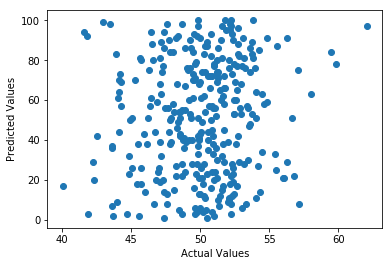

In [81]:
x_train, x_test, y_train, y_test = train_test_split(allX, y, test_size=0.2)
model = sm.OLS(y_train, x_train).fit()

predictionsOnTest = model.predict(x_test)
plt.scatter(predictionsOnTest, y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

** Due to concern about multicollinearity, we will explore the relationship between a few features that we believe could be strongly correlated. **

In [96]:
energy = pd.DataFrame(data=d1, columns=[3]) 
listOfOtherModelFeatures = [9, 13, 14] # time signature, loudness, valence

for i in listOfOtherModelFeatures:
    feature = pd.DataFrame(data=d1, columns=[i]) 
    X_train, X_test, y_train, y_test = train_test_split(feature, energy, test_size=0.2)
    model = sm.OLS(y_train, X_train).fit()
    print i," has r^2 value ",model.rsquared," and p-value ",model.pvalues," with corr coeff ", model.params

9  has r^2 value  0.947343707845  and p-value  9    0.0
dtype: float64  with corr coeff  9    0.172072
dtype: float64
13  has r^2 value  0.699306862112  and p-value  13    0.0
dtype: float64  with corr coeff  13   -0.092875
dtype: float64
14  has r^2 value  0.866195180542  and p-value  14    0.0
dtype: float64  with corr coeff  14    1.121415
dtype: float64


**High R^2 and low p-values across the board. This has important implications as our initial model included features which all demonstrate collinearity.**

**Taking a step back, we will use single least-squares regression to find the single feature that is the best predictor of rank.**

In [90]:
rank = pd.DataFrame(data=d1, columns=[1])  

for i in range(3, 15):
    feature = pd.DataFrame(data=d1, columns=[i]) 
    X_train, X_test, y_train, y_test = train_test_split(feature, rank, test_size=0.2)
    model = sm.OLS(y_train, X_train).fit()
    print i," has r^2 value ",model.rsquared

3  has r^2 value  0.708469586767
4  has r^2 value  0.464380725301
5  has r^2 value  0.71579529268
6  has r^2 value  0.349800247722
7  has r^2 value  0.301770309998
8  has r^2 value  0.0134136021613
9  has r^2 value  0.751054808243
10  has r^2 value  0.698554621567
11  has r^2 value  0.513300354642
12  has r^2 value  0.730101500787
13  has r^2 value  0.666769960351
14  has r^2 value  0.612458101348


**After running the above code segment multiple times, it appears that time signature is the single best predictor of rank.**

In [92]:
timesignature = pd.DataFrame(data=d1, columns=[9])  

rank = pd.DataFrame(data=d1, columns=[1])  

X_train, X_test, y_train, y_test = train_test_split(timesignature, rank, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     3754.
Date:                Sat, 14 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:51:32   Log-Likelihood:                -6107.4
No. Observations:                1275   AIC:                         1.222e+04
Df Residuals:                    1274   BIC:                         1.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
9             12.5262      0.204     61.272      0.0

**Let's investigate the collinearity of time signature with other features.**

In [94]:
for i in range(3, 15):
    feature = pd.DataFrame(data=d1, columns=[i]) 
    X_train, X_test, y_train, y_test = train_test_split(feature, timesignature, test_size=0.2)
    model = sm.OLS(y_train, X_train).fit()
    print i," has r^2 value ",model.rsquared

3  has r^2 value  0.946333633279
4  has r^2 value  0.643446283336
5  has r^2 value  0.942364113328
6  has r^2 value  0.522179204651
7  has r^2 value  0.37880578797
8  has r^2 value  0.0173959142689
9  has r^2 value  1.0
10  has r^2 value  0.951564992365
11  has r^2 value  0.672965188161
12  has r^2 value  0.966471872169
13  has r^2 value  0.856917644761
14  has r^2 value  0.851029496063


**Time signature is highly collinear with energy, tempo, danceability, duration. To a lesser extent, it is strongly collinear with loudness and valence.**

**Looking at the data, however, nearly every single entry has a time signature of 4/4 time. To visualize this: ** 

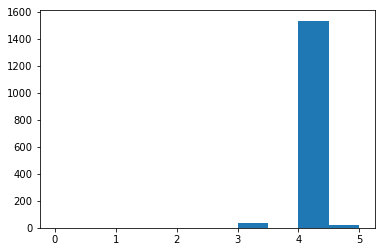

In [10]:
timesignature = pd.DataFrame(data=d1, columns=[9]) 
plt.hist(timesignature)
plt.show()

**A 4/4 time signature is common in most all popular music, not a unique feature of high-ranking songs.**

**It is a similar case for duration: most songs last ~3min, yet duration is the feature with the second-highest correlative value with rank.**

In [97]:
duration = pd.DataFrame(data=d1, columns=[12]) 
rank = pd.DataFrame(data=d1, columns=[1]) 

X_train, X_test, y_train, y_test = train_test_split(duration, rank, test_size=0.2)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3532.
Date:                Sat, 14 Apr 2018   Prob (F-statistic):               0.00
Time:                        12:14:58   Log-Likelihood:                -6151.9
No. Observations:                1275   AIC:                         1.231e+04
Df Residuals:                    1274   BIC:                         1.231e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
12             0.0002   3.59e-06     59.428      0.000       0.000       0.000
==============================================================================
Omnibus:                      157.407   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.717
Skew:                          -0.072   Prob(JB):                     5.30e-10
Kurtosis:                       2.115   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Though the R^2 value for the relationship between rank & duration is high, the coefficient is very small. Similarly, the coefficients for energy & time signature and energy & loudness that were found earlier are both low.** 

**What could be happening?**

**The large sample size could be inflating R^2 value, picking up on correlations that are very minor, and thus inflating the relationship between some features.**

**Sources consulted: **
* Least squares modeling: https://medium.com/@rob3hr/lost-when-it-comes-to-multi-linear-regression-988785c3fa55
* Train-test split: Lab 4 & https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
* Backward elimination: https://www.ndsu.edu/faculty/horsley/Stepwise_regression_(HZAU).pdf 
* Capturing multicollinearity: https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels 